In [1]:
import pathlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as mino

In [3]:
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

Using TensorFlow backend.


In [4]:
# https://www.tensorflow.org/tutorials/keras/basic_regression?hl=ko
# https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
# 첫 번째 열 -> 예측값 (Target 값)
# 예측값이 실수 -> Regression 
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
mpg_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',header=None,names=column_names,sep=' ',skipinitialspace=True,engine='python',comment='\t')

In [5]:
mpg_data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [6]:
mpg = sns.load_dataset('mpg')

In [7]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [8]:
mpg.info() # horsepower 에 missing no 값음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


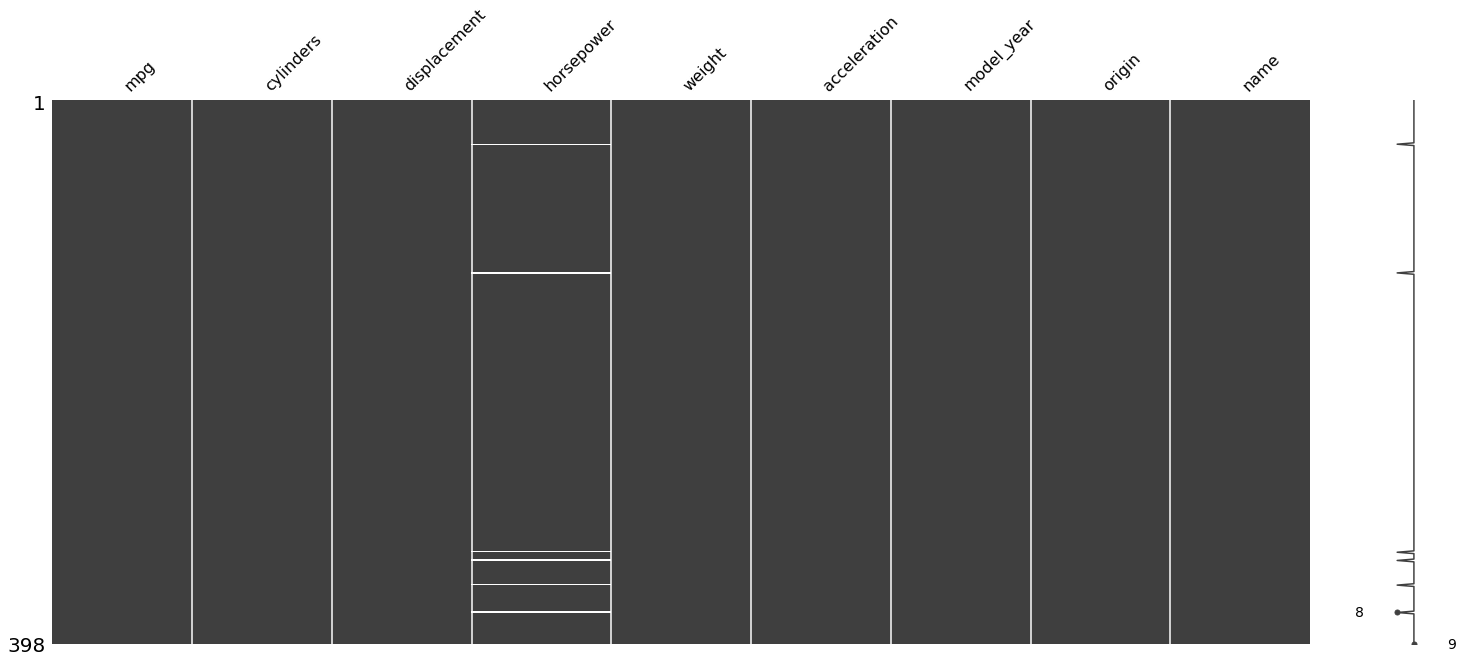

In [9]:
mino.matrix(mpg) # 흰 줄이 missing no 

In [10]:
#mino.heatmap(mpg)

In [11]:
mpg.select_dtypes('object')

,origin,name
0,usa,chevrolet chevelle malibu
1,usa,buick skylark 320
2,usa,plymouth satellite
3,usa,amc rebel sst
4,usa,ford torino
5,usa,ford galaxie 500
6,usa,chevrolet impala
7,usa,plymouth fury iii
8,usa,pontiac catalina
9,usa,amc ambassador dpl


In [12]:
mpg.select_dtypes('object')['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [13]:
mpg.select_dtypes('object')['name'].value_counts() # one hot encoding 할 때 문제가 있다. 

ford pinto                       6
toyota corolla                   5
amc matador                      5
ford maverick                    5
toyota corona                    4
amc gremlin                      4
amc hornet                       4
chevrolet chevette               4
peugeot 504                      4
chevrolet impala                 4
dodge colt                       3
pontiac catalina                 3
chevrolet nova                   3
chevrolet vega                   3
plymouth duster                  3
ford galaxie 500                 3
chevrolet citation               3
honda civic                      3
ford gran torino                 3
plymouth fury iii                3
volkswagen dasher                3
chevrolet caprice classic        3
vw rabbit                        2
subaru                           2
buick estate wagon (sw)          2
plymouth valiant                 2
datsun 710                       2
buick skylark                    2
opel manta          

In [14]:
mpg.drop(columns='name',inplace=True)

In [15]:
pd.get_dummies(mpg.origin)

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [16]:
mpg_pd = pd.concat([mpg,pd.get_dummies(mpg.origin)],axis=1)

In [17]:
mpg_pd.drop(columns='origin',inplace=True)

In [18]:
mpg_pd

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
5,15.0,8,429.0,198.0,4341,10.0,70,0,0,1
6,14.0,8,454.0,220.0,4354,9.0,70,0,0,1
7,14.0,8,440.0,215.0,4312,8.5,70,0,0,1
8,14.0,8,455.0,225.0,4425,10.0,70,0,0,1
9,15.0,8,390.0,190.0,3850,8.5,70,0,0,1


In [19]:
mpg_pd.dropna(inplace=True) # missing data 처리 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(mpg_pd.iloc[:,1:],mpg_pd.mpg)

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
# tensor 는 float를 쓰므로 1 대신 1.0을 써야 함 <- one hot encoding 은 TensorFlow에서 수행하지 않는다.

In [24]:
# TensorFlow 에서 LinearRegression 모델 사용법 
model = Sequential()
layer1 = Dense(16, input_shape=(9,), activation='relu') # input_shape=[9] 도 됨 
layer2 = Dense(16, activation='relu')
output_layer = Dense(1) # LinearRegression 의 경우 노드가 1개만 있으면 되고 activation='softmax' 필요없다. 
model.add(layer1)
model.add(layer2)
model.add(output_layer)

In [25]:
# optimizer => gradient descent 방식이고 rmsprop을 쓴다.  
# loss function => mean squared error
model.compile(optimizer='rmsprop',loss='mse',metrics=['mse'])

In [26]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
294/294 [==============================] - 0s 863us/sample - loss: 38530.5101 - mse: 38530.5117
Epoch 2/100
294/294 [==============================] - 0s 57us/sample - loss: 221.5990 - mse: 221.5990
Epoch 3/100
294/294 [==============================] - 0s 73us/sample - loss: 143.2289 - mse: 143.2289
Epoch 4/100
294/294 [==============================] - 0s 57us/sample - loss: 261.5377 - mse: 261.5377
Epoch 5/100
294/294 [==============================] - 0s 45us/sample - loss: 505.1304 - mse: 505.1305
Epoch 6/100
294/294 [==============================] - 0s 59us/sample - loss: 630.4730 - mse: 630.4730
Epoch 7/100
294/294 [==============================] - 0s 52us/sample - loss: 485.9797 - mse: 485.9797
Epoch 8/100
294/294 [==============================] - 0s 64us/sample - loss: 498.1310 - mse: 498.1310
Epoch 9/100
294/294 [==============================] - 0s 57us/sample - loss: 482.6839 - mse: 482.6839
Epoch 10/100
294/294 [==============================] - 0s 58us/samp

In [27]:
# loss 가 너무 크므로 MinMaxScaler or Standardizer 써야 한다. => 값을 0과 1 사이로 조정함 
# 최소값을 못 찾는다. => optimizer 선택은 이슈 
# 둘 중의 성능이 누가 더 좋은지 데이터 분포상태에 따라 다르다. 

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mms = MinMaxScaler()

In [30]:
mms.fit_transform(mpg_pd.iloc[:,1:])

/Users/jung-kyoyoon/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[1.        , 0.61757106, 0.45652174, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.72868217, 0.64673913, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.64599483, 0.56521739, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.2       , 0.17312661, 0.20652174, ..., 0.        , 0.        ,
        1.        ],
       [0.2       , 0.13436693, 0.17934783, ..., 0.        , 0.        ,
        1.        ],
       [0.2       , 0.13178295, 0.19565217, ..., 0.        , 0.        ,
        1.        ]])

In [31]:
# mms.fit_transform(mpg_pd.iloc[:,1:])
X_train, X_test, y_train, y_test = train_test_split(mms.fit_transform(mpg_pd.iloc[:,1:]),mpg_pd.iloc[:,0])
# mpg_pd.mpg => mpg_pd.iloc[:,0]

/Users/jung-kyoyoon/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [32]:
model2 = Sequential()
layer1 = Dense(16, input_shape=(9,), activation='relu') # input_shape=[9] 도 됨 
layer2 = Dense(16, activation='relu')
output_layer = Dense(1) # LinearRegression 의 경우 노드가 1개만 있으면 되고 activation='softmax' 필요없다. 
model2.add(layer1)
model2.add(layer2)
model2.add(output_layer)

In [33]:
model2.compile(optimizer='rmsprop',loss='mse',metrics=['mse'])

In [34]:
model2.fit(X_train,y_train,epochs=100)

Epoch 1/100
294/294 [==============================] - 0s 446us/sample - loss: 610.8930 - mse: 610.8930
Epoch 2/100
294/294 [==============================] - 0s 70us/sample - loss: 603.3844 - mse: 603.3843
Epoch 3/100
294/294 [==============================] - 0s 87us/sample - loss: 596.0776 - mse: 596.0777
Epoch 4/100
294/294 [==============================] - 0s 74us/sample - loss: 587.4561 - mse: 587.4561
Epoch 5/100
294/294 [==============================] - 0s 60us/sample - loss: 577.6394 - mse: 577.6394
Epoch 6/100
294/294 [==============================] - 0s 65us/sample - loss: 566.2341 - mse: 566.2341
Epoch 7/100
294/294 [==============================] - 0s 64us/sample - loss: 553.4194 - mse: 553.4193
Epoch 8/100
294/294 [==============================] - 0s 65us/sample - loss: 538.2568 - mse: 538.2568
Epoch 9/100
294/294 [==============================] - 0s 61us/sample - loss: 521.0994 - mse: 521.0994
Epoch 10/100
294/294 [==============================] - 0s 69us/sample -